<h3>Кубическая норма

In [ ]:
# Дальше будет использоваться для определения нормы Якобиана
def cubic_norm(A):
    x = 0
    sum = 0
    for i in range(len(A)):
        sum = 0
        for j in range(len(A[i])):
            sum += abs(A[i][j])
        if sum > x:
            x = sum
    return x


<h3>Создание пустой матрицы</h3>

In [ ]:
# Используется для решения СЛАУ
def create_matrix(x, y):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*y)
    return A


<h3>Создание единичной матрицы</h3>

In [ ]:
# Используется для решения СЛАУ
def create_I_matrix(x):  # x - размерность матрицы
    A = []
    for i in range(x):
        A.append([0]*x)
        A[i][i] = 1
    return A


<h3> Произведение матриц </h3>

In [ ]:
# Используется для решения СЛАУ
def matrix_product(A, B):
    n = len(A)
    m = len(B[0])
    R = create_matrix(n, m)
    for i in range(n):
        for j in range(m):
            for k in range(n):
                R[i][j] += A[i][k] * B[k][j]
    return R


<h3>Решение системы ЛУ при треугольных матрицах

In [ ]:
# Используется для решения СЛАУ
def solution(A, q, b):
    # q определяет A - это нижняя треугольная матрица или верхняя
    n = len(A)
    x = []
    if q:
        for i in range(n):
            x.append([0] * len(b[i]))
            for k in range(len(b[i])):
                for j in range(i+1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    else:
        for i in range(n):
            x.append([0] * len(b[i]))
        for i in range(n-1, -1, -1):
            for k in range(len(b[i])):
                for j in range(n-1, i-1, -1):
                    if i == j:
                        x[i][k] += b[i][k] / A[i][i]
                    else:
                        x[i][k] -= A[i][j] * x[j][k] / A[i][i]
    return x


<h2>LU разложение</h2>

In [ ]:
# Используется для решения СЛАУ
def LU(A):  # Собственно реализация LU разложения
    U = []
    for i in A:
        U.append(i.copy())
    n = len(A)
    L = create_matrix(n, n)
    for i in range(n):
        for j in range(n):
            # Выбор главного элемента
            m = j
            for k in range(j+1, n):
                if U[i][k] > U[i][m]:
                    m = k
            if m != j:
                for k in range(n):
                    x = U[i][m]
                    U[i][m] = U[i][j]
                    U[i][j] = x

            U[0][i] = A[0][i]
            L[i][0] = A[i][0] / U[0][0]
            sum = 0
            for k in range(i):
                sum += L[i][k] * U[k][j]
            U[i][j] = A[i][j] - sum
            if (i > j):
                L[j][i] = 0
            else:
                sum = 0
                for k in range(i):
                    sum += L[j][k] * U[k][i]
                L[j][i] = (A[j][i] - sum) / U[i][i]
    return L, U


<h1>TEST

In [ ]:
from math import cos, sin, asin
def f(x,y):
    return 0.8-cos(y-1)
def g(x,y):
    return 2+cos(x)
def F(x,y):
    return f(x,y)**2+g(x,y)**2

def ff(x):
    return cos(x)-1.2
def gg(x):
    try:
        return asin(2*x-2)+0.5
    except:
        return None

def jacobian(x,y):
    A = [[0, sin(y-1)], 
         [-sin(x), 0]]
    return cubic_norm(A)
def fsh(x,y):
    return sin(y-1)

def gsh(x,y):
    return -sin(x)




x0 = 0.9
y0 = 2.6
e = 10 **(-10)

<h2> Вариант 24

In [52]:
from math import cos, sin, asin, acos, pi
# Начальные значения и точность
x0, y0 = 1.139, 0.78
e = 10 **(-12)
arr1 = 0.5
arr2 = 1.5
q = -1
xid, yid = 1.1388173974691207, 0.7813312360330628
var_newton = """Вариант 24

x0 = 1.139  y0 = 0.78

Метод Ньютона

Матрица производных
-sin(x),        1
    2,     -cos(y-0.5)
Itr           x                   y               Норма невязки                    F1                              F2"""
var_sim_it = """
 Метод простой итерации 
 Fi1(x,y)=cos(x)+y-1.2
 Fi2(x,y)=2*x-sin(y-0.5)-2
 Якобиан 
|-sin(x)     1      |
|   2    -cos(y-0.5)|

Значение 
|-0.9080723847057184           1        |
|        2           -0.9606406373319826|
Norma={}

Itr             x                y               Норма невязки            Погрешность             Норма якобиана""".format(jacobian(x0,y0))
# Основные функции f & g
def f(x,y):
    return cos(x)+y-1.2
def g(x,y):
    return 2*x-sin(y-0.5)-2
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def ff(x):
    return 1.2 - cos(x)
def gg(x):
    return 1 + sin(x-0.5) / 2
# Собственно, Якобиан
def jac(x,y):
    return [[-sin(x), 1], [2, -cos(y-0.5)]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return sin(y-0.5)/2 +1
def pfiy(x,y):
    return 1.2-cos(x)
def Fsh_x(x,y):
    return -2*sin(x)*cos(x)-2*y*sin(x)+2.4*sin(x)-4*sin(y-0.5)+8*x-8
def Fsh_y(x,y):
    return 2*cos(x)+2*y-2.4+cos(y-0.5)*(-4*x+4+2*sin(y-0.5))



<h2> Вариант 25

In [80]:
from math import cos, sin

# Начальные значения и точность
x0, y0 = -0.13, -0.9
e = 10 **(-12)
arr1 = -1
arr2 = 0
q = 1
xid, yid = -0.13355832611734098, -0.8665808075387158
var_newton = """Вариант 25

x0 = -0.13   y0 = -0.9

Метод Ньютона

Матрица производных
    1   -sin(y+0.5) 
cos(x)      -2
Itr           x                   y               Норма невязки                    F1                              F2"""
var_sim_it = """
 Метод простой итерации 
 Fi1(x,y)=cos(y+0.5)+x-0.8
 Fi2(x,y)=sin(x)-2*y-1.6
 Якобиан 
  1     -sin(y+0.5) 
cos(x)      -2

Значение 
|        1           0.3894183423086505|
|0.9915618937147881          -2        |
Norma={}

Itr             x                y               Норма невязки            Погрешность             Норма якобиана""".format(jacobian(x0,y0))
# Основные функции f & g
def g(x,y):
    return cos(y+0.5)+x-0.8
def f(x,y):
    return sin(x)-2*y-1.6
# F для метода градиентного спуска
def F(x,y):
    return f(x,y)**2+g(x,y)**2
# преобразованные функции для графиков
def gg(x):
    return 0.8 - cos(x+0.5)
def ff(x):
    return (sin(x)-1.6)/2
    
# Собственно, Якобиан
def jac(x,y):
    return [[1, -sin(y+0.5)], [cos(x), -2]]
def jacobian(x,y):
    return cubic_norm(jac(x,y))
# Функции для преобразования x & y
def pfix(x,y):
    return (0.8 - cos(y + 0.5))
def pfiy(x,y):
    return (sin(x) / 2 - 0.8)
def Fsh_x(x,y):
    return 2*cos(y+0.5)+2*x-1.6+ cos(x)*(2*sin(x)-4*y-3.2)
def Fsh_y(x,y):
    return 2*sin(y+0.5)*(-cos(y+0.5)-2*x+1.6)-4*sin(x)+8*y+6.4
jac(x0,y0)

[[1, 0.3894183423086505], [0.9915618937147881, -2]]

<h1>Метод Ньютона

In [67]:
def b(x,y):
    return [[g(x,y)], [f(x,y)]]

print(var_newton)

e = 10 **(-12)
x,y = x0,y0
prevx,  prevy = 0, 0
i = 0
while abs(prevx - x) >= e or abs(prevy - y) >= e:
    i += 1
    w = jac(x,y)
    L,U = LU(w)
    Y = solution(L, True, b(x,y))
    X = solution(U, False, Y)
    prevx, prevy = x, y
    x -= X[0][0]
    y -= q * X[1][0]
    print("""{:<3}|{:<20}|{:<20}||{:<25}|{:<25}|{:<25}|""".format(i, x, y, F(x,y), f(x,y),  g(x,y)))
x_new, y_new = x,y

Вариант 25

x0 = -0.13   y0 = -0.9

Метод Ньютона

Матрица производных
    1   -sin(y+0.5) 
cos(x)      -2
Itr           x                   y               Норма невязки                    F1                              F2
1  |-0.1339912888262411 |-0.8667958762633026 ||2.6017293811152507e-07   |1.0430673273997826e-06   |-0.0005100704364321418   |
2  |-0.1335583425309467 |-0.8665808219196087 ||6.224028770815069e-16    |1.2506883528828894e-08   |-2.158658707340777e-08   |
3  |-0.13355832610353618|-0.8665808075256102 ||4.930380657631324e-32    |0.0                      |-2.220446049250313e-16   |
4  |-0.133558326103536  |-0.8665808075256101 ||1.232595164407831e-32    |0.0                      |1.1102230246251565e-16   |


<h1>Метод простой итерации

In [68]:
from math import sqrt
def q(x,y):
    return (pfix(x,y), pfiy(x,y))
e = 10 **(-10)
prevx, prevy =  x0, y0
x, y = q(x0, y0)

print(var_sim_it)
i = 0

while abs(prevx - x) >= e or abs(prevy - y) >= e:
    i+=1
    prevx, prevy = x,y
    x,y = q(x,y,)
    print("""{:<3}|{:<20}|{:<20}|{:<25}|{:<22}|{:<20}|""".format(i, x, y, F(x,y),sqrt((x_new - x)**2+ (y_new - y)**2),  jacobian(x,y)))
x_simp, y_simp = x, y


 Метод простой итерации 
 Fi1(x,y)=cos(y+0.5)+x-0.8
 Fi2(x,y)=sin(x)-2*y-1.6
 Якобиан 
  1     -sin(y+0.5) 
cos(x)      -2

Значение 
|        1           0.3894183423086505|
|0.9915618937147881          -2        |
Norma=2.169967142900241

Itr             x                y               Норма невязки            Погрешность             Норма якобиана
1  |-0.1341890418019508 |-0.860382751859719  |0.00017202517190630215   |0.006230063910563916  |2.9910101524739767  |
2  |-0.13576192150934274|-0.8668933436402789 |7.791441859459913e-06    |0.002225648565129933  |2.9907984963403846  |
3  |-0.13344625959221024|-0.8676726304528521 |5.344020910535095e-06    |0.0010975592045134475 |2.9911092534533212  |
4  |-0.13316643254652516|-0.8665252728652799 |2.464968033824138e-07    |0.0003958088661520684 |2.9911464457904735  |
5  |-0.133578229703314  |-0.8663866006753471 |1.6904712145795398e-07   |0.00019522411217157024|2.9910916861274357  |
6  |-0.13362791718876832|-0.8665906706849316 |7.772500826905

<h1>Метод градиентного спуска

In [74]:
e = 10 **(-10)
prevx, prevy =  0, 0
x, y = x0, y0
def alp(x,y):
    a_min = 20
    F_min = F(x,y)
    a = a_min
    q = False
    for i in range(150):
        FF = F(x - a * Fsh_x(x,y), y - a * Fsh_y(x,y))
        if FF < F_min:
            F_min = FF
            a_min = a
            q = True
        elif q == True:
            break
        a /= 2
    return a_min, i
i = 0
m = 0
print("""
 Метод градиентного спуска
  
Itr       x                          y                     Alfa        Норма невязки               Погрешность        k """)
while abs(prevx - x) >= e or abs(prevy - y) >= e:
    i+=1
    alpha, k = alp(x,y)
    m += k
    prevx, prevy = x,y
    x -= alpha * Fsh_x(x,y)
    y -= alpha * Fsh_y(x,y)
    print("""{:<3}|{:<25}|{:<25}||{:<10}|{:<25}|{:<22}|{:=3}|""".format(i, x, y, alpha,  F(x,y),sqrt((x_new - x)**2+ (y_new - y)**2),  k))
print(" Общее число итераций =  ", m)
x_grad, y_grad = x, y


 Метод градиентного спуска
  
Itr       x                          y                     Alfa        Норма невязки               Погрешность        k 
1  |-0.13475258568748166     |-0.8608866193838371      ||0.0390625 |0.00015874424791021752   |0.005818078252116706  | 10|
2  |0.33030335804271455      |34.881173908709044       ||20        |5047.720730255025        |35.7507641165066      |149|
3  |21.688812050054896       |-18.956373602965826      ||0.15625   |1816.1140622062303       |28.345307410860755    |  8|
4  |23.741540826364616       |-5.114071231617942       ||0.078125  |580.2542725822059        |24.24998009159887     |  9|
5  |19.958902552006315       |3.8050182186797166       ||0.078125  |421.17218036115185       |20.628398425472042    |  9|
6  |17.605676691825558       |-4.134226140132188       ||0.078125  |286.32704278255954       |18.03768180895282     |  9|
7  |14.830383653080379       |0.19856505801756175      ||0.078125  |220.43386501505947       |15.001803067340484    

<h2>График функций

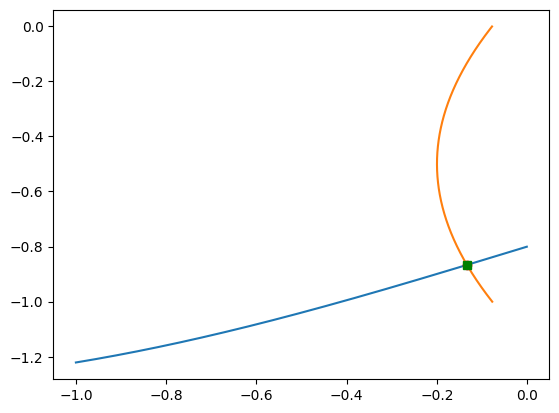

In [81]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(arr1, arr2, 0.001)
y1=[]
y2=[]
dx=0
dy=0
fi=10000
for i in x:
    y1.append(ff(i))
    y2.append(gg(i))
for i in enumerate(x):
    for j in enumerate(x):
        if (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2  < fi:
            fi = (y1[i[0]] - j[1]) ** 2 + (y2[j[0]] - i[1]) ** 2
            dx = i[1]
            dy = y1[i[0]]
plt.plot(x, y1, y2, x, x_new, y_new, "ro", x_simp, y_simp,"gs", x_grad, y_grad, )
plt.show()